# Step 1 | Initialization

#### Step 1.1 | Importing Necessary Libraries

In [2]:
# Data Handling
#===================
import pandas as pd

# Pattern Mining
#===================
from mlxtend.frequent_patterns import apriori, association_rules

# Visualizations
#===================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

/var/folders/d3/mb3yqvls6894k9653zg1_86m0000gp/T/ipykernel_79844/786021442.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Step 1.2 | Loading the Dataset

In [3]:
path='dataset/Dataset_1.csv'
original_df=pd.read_csv(path,delimiter=';')
df=original_df.copy()   #Making a copy of original dataframe if need to preserve original structure
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


# Step 2 | Overview and Data Cleaning

#### Step 2.1 | Overview

In [ ]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values with {} % and {} missing values.".format(df.duplicated().sum(),round((df.duplicated().sum())/len(df)*100,2),df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 7 columns and 522064 rows.
The DataFrame has 5284 duplicated values with 1.01 % and 135496 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB
None


#### Step 2.2 | Data Cleaning(Handling Duplicates)

In [ ]:
##### In this step we are removing all the duplicate rows (5284) from original dataframe
df.drop_duplicates(inplace=True)


#### Step 2.3 | Data Wrangling(Handling Missing Values)

In [ ]:
print("#" * 30)
print(" " * 5, "Null Distribution")
print("#" * 30)
null = df.isnull().sum().to_frame().rename(columns = {0:'count'})
null['%'] = (null['count'] / len(df)) * 100.
null = null.sort_values(by = '%', ascending = False)
null.style.background_gradient(cmap = 'PRGn')

##############################
      Null Distribution
##############################


,count,%
CustomerID,133967,25.923410
Itemname,1455,0.281551
BillNo,0,0.000000
Quantity,0,0.000000
Date,0,0.000000
Price,0,0.000000
Country,0,0.000000


#### Step 2.4 | Data Cleaning (Ensuring Consistency)

In [ ]:
df = df.rename(columns={'Itemname': 'ItemName'})
df['ItemName'] = df['ItemName'].str.lower()

In [ ]:
#Dropping Missing rows in CustomerID column
df.dropna(subset=['CustomerID'], inplace=True)

#Dropping data with negative or zero quantity
df=df.loc[df['Quantity']>0]

#Dropping data with zero price
df=df.loc[df['Price']>'0']

#Dropping Non-product data.
df=df.loc[(df['ItemName']!='postage')&(df['ItemName']!='dotcom postage')&(df['ItemName']!='adjust bad debt')&(df['ItemName']!='manual')]



#### Step 2.5 | Changing Data Types

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y %H:%M")
df['Price'] = df['Price'].str.replace(',','.')
df['Price'] = df['Price'].astype('float')
df['CustomerID'] = df['CustomerID'].astype('int')

# Step 3 | Data Transformation

In [ ]:
#Make Month and year columns separately
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day_name()

#Creating a Total price column
df['Total price']=df.Quantity*df.Price


In [ ]:
df.sample(5)

,BillNo,ItemName,Quantity,Date,Price,CustomerID,Country,Month,Year,Day,Total price
307294,564842,heart of wicker small,40,2011-08-30 13:47:00,1.45,16133,United Kingdom,8,2011,Tuesday,58.00
483400,578843,set/10 red polkadot party candles,2,2011-11-25 16:13:00,1.25,17813,United Kingdom,11,2011,Friday,2.50
180614,552905,enamel flower jug cream,3,2011-05-12 11:10:00,5.95,15974,United Kingdom,5,2011,Thursday,17.85
319008,566024,alarm clock bakelike red,4,2011-09-08 12:51:00,3.75,13871,United Kingdom,9,2011,Thursday,15.00
196856,554617,herb marker parsley,1,2011-05-25 11:21:00,0.65,14593,United Kingdom,5,2011,Wednesday,0.65


# Step 4 | Exploratoty Data Analysis

#### Step 4.1 | Country Selection

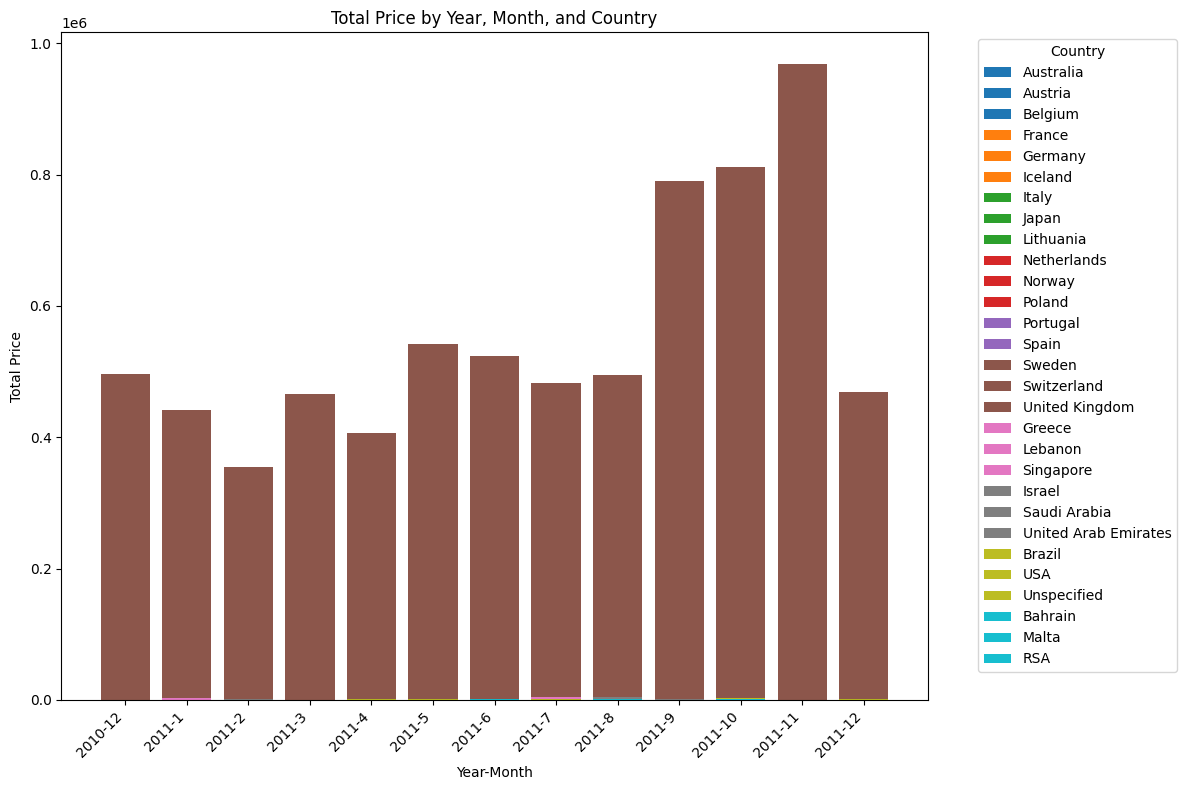

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
result = df.groupby(['Year', 'Month', 'Country'])['Total price'].sum()

# Convert the result to a DataFrame for easy plotting
result_df = result.reset_index()
# result_df=result_df.loc[result_df['Country']!='United Kingdom']

# Convert 'Year' and 'Month' to strings
result_df['YearMonth'] = result_df['Year'].astype(str) + '-' + result_df['Month'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', len(result_df['Country'].unique()))

for country, color in zip(result_df['Country'].unique(), colors.colors):
    country_data = result_df[result_df['Country'] == country]
    plt.bar(country_data['YearMonth'], country_data['Total price'], label=country, color=color)

plt.title('Total Price by Year, Month, and Country')
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
country_counts = df['Country'].value_counts()
total_records = len(df)

# Create a new DataFrame
country_stats_df = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values,
    'Percentage': country_counts / total_records * 100
})

# Display the DataFrame
(country_stats_df).head()


,Country,Count,Percentage
Country,,,
United Kingdom,United Kingdom,348878,91.462922
Germany,Germany,8643,2.265875
France,France,8021,2.102810
Spain,Spain,2417,0.633648
Netherlands,Netherlands,2322,0.608743


In [ ]:
# From this higest records belongs to United Kingdom hence extract data for only United Kingdom.
df=df.loc[df['Country'] == 'United Kingdom']


#### Step 4.2 | Categorization

In [ ]:
#Top 10 highest sales amount items
top_items_price=df[['ItemName','Total price']].sort_values(by='Total price',ascending=False).head(10)

#Top 10 most purchased items
top_items_quantity=df[['ItemName','Quantity']].sort_values(by='Quantity',ascending=False).head(10)

top_items_quantity

,ItemName,Quantity
520583,"paper craft , little birdie",80995
59999,medium ceramic top storage jar,74215
405138,world war 2 gliders asstd designs,4800
198929,small popcorn holder,4300
94245,empire design rosette,3906
260928,essential balm 3.5g tin in envelope,3186
51228,fairy cake flannel assorted colour,3114
154834,fairy cake flannel assorted colour,3114
416997,small chinese style scissor,3000
280572,assorted colour bird ornament,2880


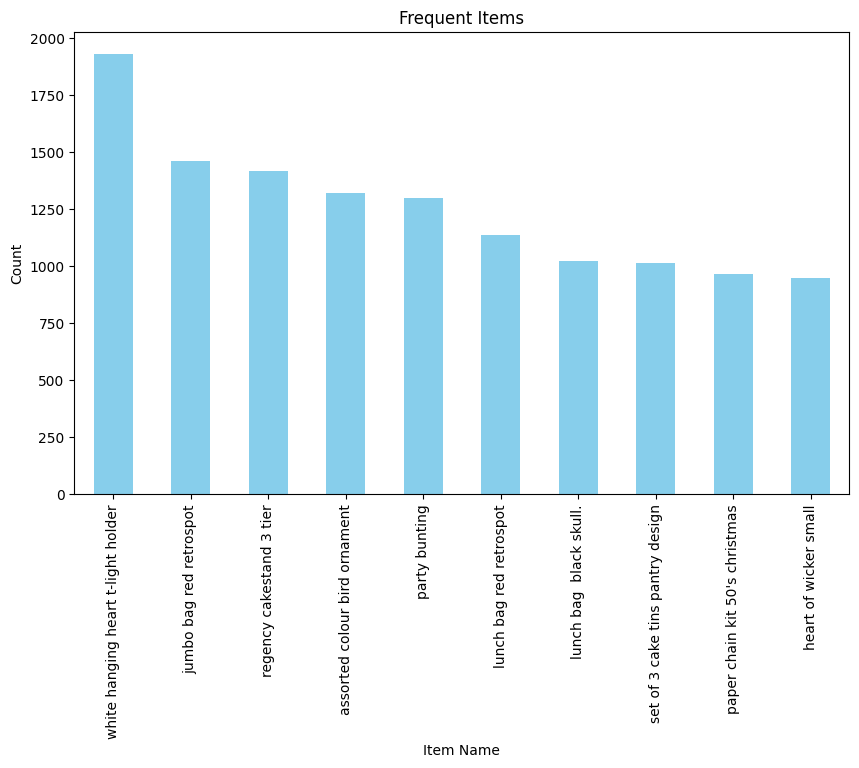

In [ ]:
frequent_items = df['ItemName'].value_counts().sort_values(ascending=False).head(10)
frequent_items.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Frequent Items')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.show()